# Part 1 : Modelling

## Part 1-Section 1: Data preparation

## 1. Import necessary libraries

In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, ConfusionMatrixDisplay

In [2]:
pd.set_option('display.max_columns', None)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## 2. Load the dataset

### 2.1 Read header file

In [3]:
headers_file = "./part-1-dataset/field_names.txt"
headers = []
with open(headers_file, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        headers.append(row[0])

In [4]:
len(headers)

32

### 2.2 Read data file and set column names from the headers file

In [5]:
cancer_raw = pd.read_csv("./part-1-dataset/breast-cancer.csv", names = headers)

In [6]:
cancer_raw.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2.3 Check if all IDs are unique in the dataset

In [7]:
cancer_raw['ID'].count()

569

In [8]:
cancer_raw['ID'].nunique()

569

### 2.4 Check for duplicate rows

In [9]:
cancer_raw[cancer_raw[cancer_raw.columns].duplicated() == True].shape[0]

0

## Part 1-Section 2 : Exploratory Data Analysis (EDA)

### 2.5 See the distribution of the 2 kinds of tumors

In [10]:
print("Number of benign tumor records in the dataset : {}".format(cancer_raw[cancer_raw["diagnosis"] == "B"].shape[0]))
print("Number of malignant tumor records in the dataset : {}".format(cancer_raw[cancer_raw["diagnosis"] == "M"].shape[0]))
## cancer_raw[cancer_raw["diagnosis"] == "M"].shape[0]

Number of benign tumor records in the dataset : 357
Number of malignant tumor records in the dataset : 212


  diagnosis  Count
0         B    357
1         M    212


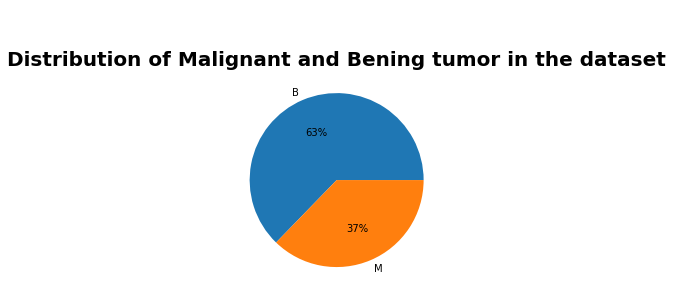

In [11]:
# diagnosis_stats = 
diagnosis_stats = cancer_raw.groupby("diagnosis").aggregate({'ID':'count'}).reset_index()
diagnosis_stats.rename(columns={"ID":"Count"}, inplace=True)
print(diagnosis_stats.head())

plt.pie(diagnosis_stats["Count"], labels = diagnosis_stats["diagnosis"],  autopct='%.0f%%')
plt.title("\n\nDistribution of Malignant and Bening tumor in the dataset", fontweight='bold', fontsize=20)
plt.show()

- **As you can see, there is a slight imbalance in the dataset but it's not very huge**

In [12]:
cancer_raw.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
cancer_raw.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 3. Let's further dig into the data to find some interesting patterns

It is clear from the dataset that 
1. the 'diagnosis' column is the dependant variable or the output variable 
2. 'ID' column should be left out for any EDA and modeling as it is the identifier variable
3. All remaning columns are the dependant variables

In [14]:
iv = cancer_raw["diagnosis"] # independant variable
dv = cancer_raw.drop(["ID"], axis=1) # depandant variables 

Create 3 different dataframes for feature_mean, feature_sd_error and feature_worst variables

In [15]:
mean_cols = [col for col in dv.columns if "_mean" in col]
mean_cols.append('diagnosis')
sd_error_cols = [col for col in dv.columns if "_sd_error" in col]
sd_error_cols.append('diagnosis')
worst_cols = [col for col in dv.columns if "_worst" in col]
worst_cols.append('diagnosis')

In [16]:
dv_mean = dv[mean_cols]
dv_sd_error = dv[sd_error_cols]
dv_worst = dv[worst_cols]

### 3.1. First, let us look into the mean of all the properties

#### Means of each property

In [17]:
df = dv_mean.describe()
df[df.index.isin(['mean','std','max'])].style.background_gradient(axis=1, vmin=1, vmax=50)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
mean,14.127292,654.889104,0.088799,0.062798,2.866059,0.025478,0.020542,25.677223,0.132369,0.114606
std,3.524049,351.914129,0.079720,0.007060,2.021855,0.017908,0.008266,6.146258,0.022832,0.065732
max,28.110000,2501.000000,0.426800,0.097440,21.980000,0.135400,0.078950,49.540000,0.222600,0.291000


#### Looking at the average and std dev of the feature_mean's, the values are not standardized and the scale varies a lot so let us standardize them

In [18]:
dv_mean_target = dv_mean['diagnosis']
dv_mean_values = dv_mean.drop(['diagnosis'], axis=1)
dv_mean_standardized = (dv_mean_values - dv_mean_values.mean()) / (dv_mean_values.std())              # standardization
mean_data = pd.concat([dv_mean_target,dv_mean_standardized],axis=1)

- Visualize the box and whisker plot to better understand how the minimum, first quartile, median, third quartile, and maximum of **feature_mean** varies for Malignant and Bening tumors after standardization

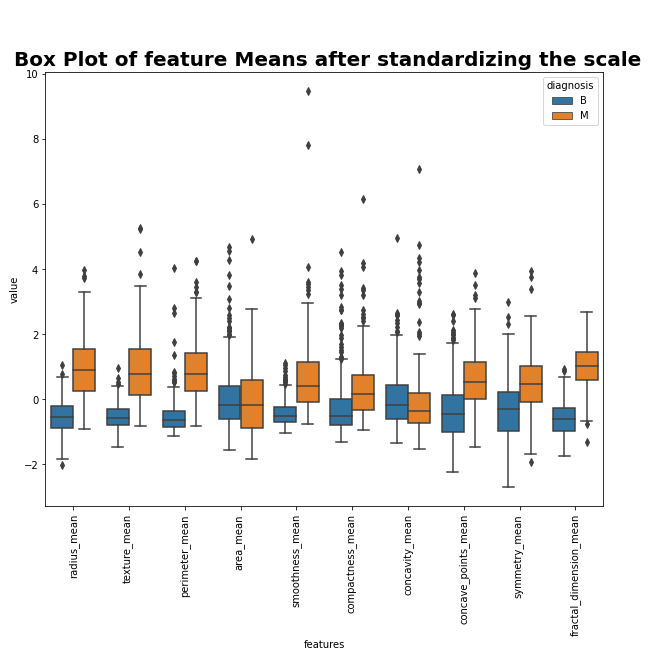

In [19]:
mean_data_melted = pd.melt(mean_data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,8))
sns.boxplot(x="features", y="value", hue="diagnosis", data=mean_data_melted, hue_order = ['B', 'M'])
plt.xticks(rotation=90)
plt.title("\n\n Box Plot of feature Means after standardizing the scale", fontweight='bold', fontsize=20)
plt.show()

## Learnings from plotting the box plot of feature means:

- For malignant tumor, the median of feature_means is generally higher for all features/dependant variables **except for concavity** which is lower
- the medians of **area_mean** feature for malignant and benign tumors are about the same, but there are **more outliers** for benign tumor as compared to malignant tumor 
- The **max value** of mean is higher for malignant tumor as compared to bening tumor for all feature_mean variables
- The **min value** of mean is higher for malignant tumor as compared to benign tumor **except for area_mean and concavity_mean features**

### 3.2 Now let us look at the Standard Errors of each property

#### SD_Errors of each property

In [20]:
df = dv_sd_error.describe()
df[df.index.isin(['mean','std','max'])].style.background_gradient(axis=1, vmin=1, vmax=50)

,radius_sd_error,texture_sd_error,perimeter_sd_error,area_sd_error,smoothness_sd_error,compactness_sd_error,concavity_sd_error,concave_points_sd_error,symmetry_sd_error,fractal_dimension_sd_error
mean,19.289649,0.096360,0.048919,0.405172,40.337079,0.031894,0.003795,107.261213,0.254265,0.290076
std,4.301036,0.014064,0.038803,0.277313,45.491006,0.030186,0.002646,33.602542,0.157336,0.061867
max,39.280000,0.163400,0.201200,2.873000,542.200000,0.396000,0.029840,251.200000,1.058000,0.663800


- Looking at the average and std dev of the feature_sd_error's, the values are not standardized as well and the scale varies a lot so let us standardize them

In [21]:
dv_sd_error_target = dv_sd_error['diagnosis']
dv_sd_error_values = dv_sd_error.drop(['diagnosis'], axis=1)
dv_sd_error_standardized = (dv_sd_error_values - dv_sd_error_values.mean()) / (dv_sd_error_values.std())              # standardization
sd_error_data = pd.concat([dv_sd_error_target, dv_sd_error_standardized],axis=1)

- Visualize the box and whisker plot to better understand how the minimum, first quartile, median, third quartile, and maximum of **feature_sd_error** varies for Malignant and Bening tumors after standardization

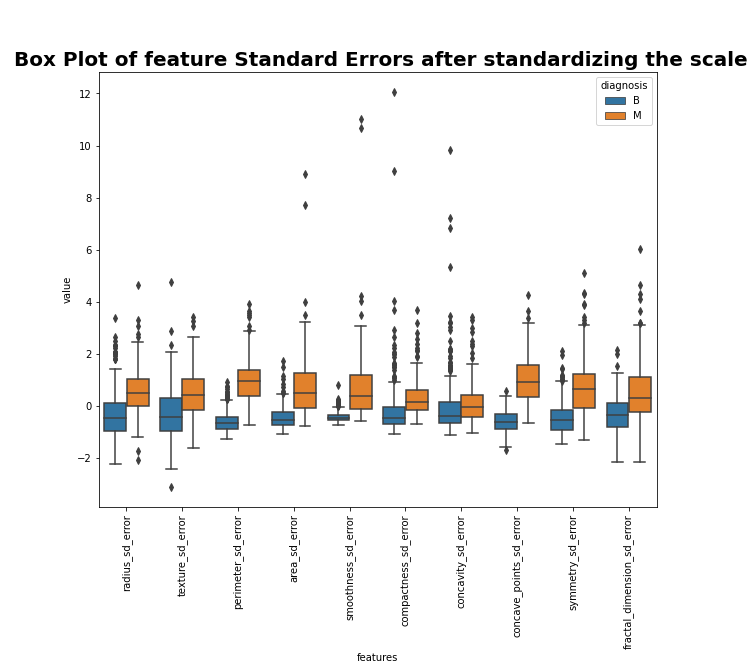

In [22]:
sd_error_melted = pd.melt(sd_error_data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,8))
sns.boxplot(x="features", y="value", hue="diagnosis", data=sd_error_melted, hue_order = ['B', 'M'])
plt.xticks(rotation=90)
plt.title("\n\n Box Plot of feature Standard Errors after standardizing the scale", fontweight='bold', fontsize=20)
plt.show()

## Learnings from plotting the box plot of feature sd_errors:

- For malignant tumor, the **median** of variable_sd_error is  higher for all feature_sd_error variables
- The **min value** of sd_error is higher for malignant tumor as compared to benign tumor for all feature_sd_error variables
- The **max value** of sd_error is higher for malignant tumor as compared to bening tumor for all feature_sd_error variable **except for texture_sd_error and compactness_sd_error**


### 3.3 Worst value of each property

In [23]:
df = dv_worst.describe()
df[df.index.isin(['mean','std','max'])].style.background_gradient(axis=1, vmin=1, vmax=100)

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
mean,91.969033,0.104341,0.181162,1.216853,0.007041,0.011796,16.269190,880.583128,0.272188,0.083946
std,24.298981,0.052813,0.027414,0.551648,0.003003,0.006170,4.833242,569.356993,0.208624,0.018061
max,188.500000,0.345400,0.304000,4.885000,0.031130,0.052790,36.040000,4254.000000,1.252000,0.207500


- Looking at the average and std dev of the feature_worst's, the values are also not standardized and the scale varies a lot so let us standardize them

In [24]:
dv_worst_target = dv_worst['diagnosis']
dv_worst_values = dv_worst.drop(['diagnosis'], axis=1)
dv_worst_standardized = (dv_worst_values - dv_worst_values.mean()) / (dv_worst_values.std())              # standardization
worst_data = pd.concat([dv_worst_target, dv_worst_standardized],axis=1)

- Visualize the box and whisker plot to better understand how the minimum, first quartile, median, third quartile, and maximum of **feature_worst** varies for Malignant and Bening tumors after standardization

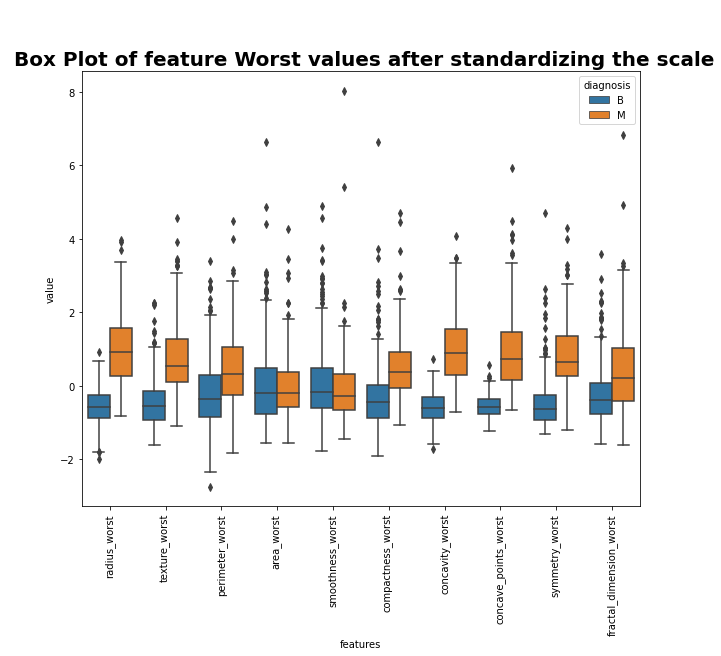

In [25]:
worst_melted = pd.melt(worst_data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,8))
sns.boxplot(x="features", y="value", hue="diagnosis", data=worst_melted, hue_order = ['B', 'M'])
plt.xticks(rotation=90)
plt.title("\n\n Box Plot of feature Worst values after standardizing the scale", fontweight='bold', fontsize=20)
plt.show()

## Learnings from plotting the box plot of feature worst:

- For malignant tumor, the median of feature_means is generally higher for all features/dependant variables **except for smoothness_worst** which is lower and **area_worst** which is about the same
- The **max value** of worst is higher for malignant tumor as compared to bening tumor **except for area_worst and compactness_worst features** variables
- The **min value** of worst is higher for malignant tumor as compared to benign tumor **except for area_mean** which is about the same

## 4. Does the mean and median of smoothness and compactness vary for Benign and Malignant tumors ?

### 4.1 Aggregate the raw data to find the mean and median of smoothness and compactness of tumor

In [26]:
cancer_stats = cancer_raw[["diagnosis","smoothness_mean","compactness_mean"]]\
                        .groupby("diagnosis")\
                        .agg({'smoothness_mean':['mean','median'],
                              'compactness_mean':['mean','median']}
                            ).reset_index()

In [27]:
cancer_stats.columns = ['diagnosis','mean_smoothness', 'median_smoothness', 'mean_compactness', 'median_compactness']

In [28]:
cancer_stats

,diagnosis,mean_smoothness,median_smoothness,mean_compactness,median_compactness
0,B,2.000321,1.8510,0.021438,0.01631
1,M,4.323929,3.6795,0.032281,0.02859


**Numbers are fine, but let's visualize them**

### 4.2 Plot the mean and median statistic of smoothness and compactness of the two kinds of tumors

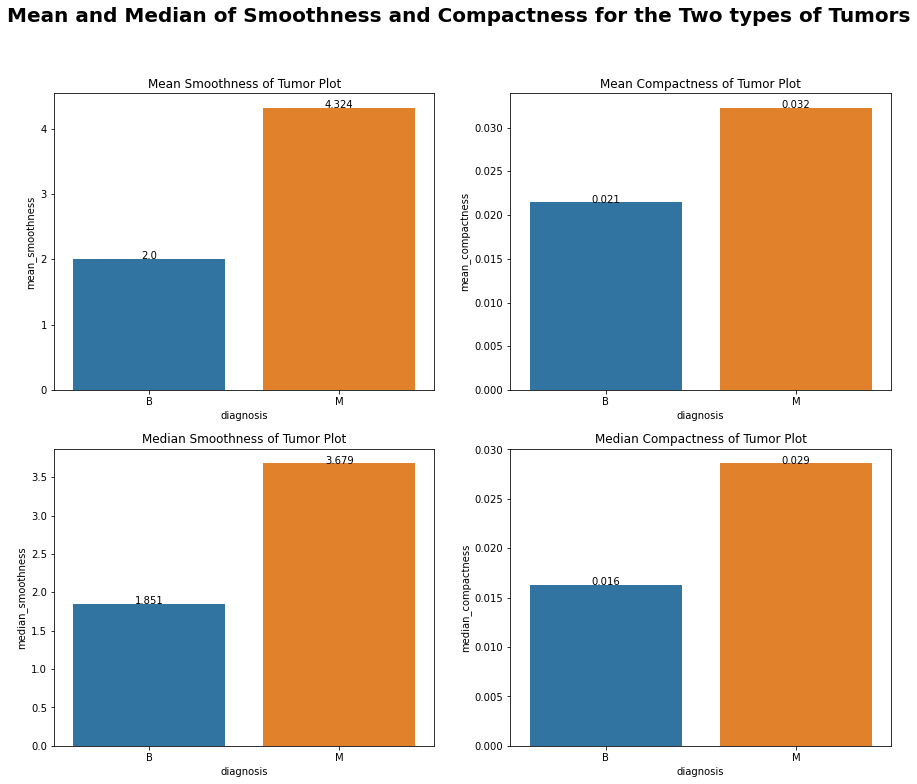

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharey=False)
fig.suptitle('Mean and Median of Smoothness and Compactness for the Two types of Tumors', fontweight='bold', fontsize=20)

# mean of smoothness
mean_smoothness_plot = sns.barplot(ax=axes[0,0], x = "diagnosis", y = "mean_smoothness", data = cancer_stats, ci=None)
for index, row in cancer_stats.iterrows():
    mean_smoothness_plot.text(row.name,row["mean_smoothness"], round(row["mean_smoothness"],3), color='black', ha="center")
axes[0,0].set(title='Mean Smoothness of Tumor Plot')

# mean of compactness
mean_compactness_plot = sns.barplot(ax=axes[0,1], x = "diagnosis", y = "mean_compactness", data = cancer_stats)
for index, row in cancer_stats.iterrows():
    mean_compactness_plot.text(row.name,row["mean_compactness"], round(row["mean_compactness"],3), color='black', ha="center")
axes[0,1].set(title='Mean Compactness of Tumor Plot')

# median of smoothness
median_smoothness_plot = sns.barplot(ax=axes[1,0], x = "diagnosis", y = "median_smoothness", data = cancer_stats)
for index, row in cancer_stats.iterrows():
    median_smoothness_plot.text(row.name,row["median_smoothness"], round(row["median_smoothness"],3), color='black', ha="center")
axes[1,0].set(title='Median Smoothness of Tumor Plot')

# median of compactness
median_compactness_plot = sns.barplot(ax=axes[1,1], x = "diagnosis", y = "median_compactness", data = cancer_stats)
for index, row in cancer_stats.iterrows():
    median_compactness_plot.text(row.name,row["median_compactness"], round(row["median_compactness"],3), color='black', ha="center")
axes[1,1].set(title='Median Compactness of Tumor Plot')

plt.show()

## Learnings from plotting the mean and median of smoothness and compactness features
- **As it is evident, the mean and median of smoothness and compactness is higher for Malignant Tumor**

## Part 1-Section 3 : Create Bootstrapped data samples

## 5. Create bootstrap samples of data 

- Implement a function to generate samples for every unique patient ID, so that the mean of the samples is the same for the patient ID

In [30]:
def get_bootstrapped_samples(mean, std_error, sample_size):
    """
    Returns a set of bootstrapped samples as list.
    Methodology: Compute the standard deviation using standard error and sample size. Use the Numpy.random.normal function to generate the samples automatically. 
    This function assumes a normal distribution os the samples

            Parameters:
                    mean (float): The pre-computed mean of the sample
                    std_error (float): The pre-computed standard error of the sample
                    sample_size (int): Total number of samples to generate using this function 

            Returns:
                    sample (list): The estimated sample 
    """
    std_dev = std_error*math.sqrt(sample_size)
    sample = np.random.normal(mean, std_dev, sample_size)
    return list(sample)
    

- Input the number of samples needed

In [31]:
number_of_samples = 9

In [32]:
cols_samples = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"] # all features

In [33]:
sample_col_names = ["ID"]
for col in cols_samples:
    sample_col_names.append(col+"_sample")

In [34]:
print(sample_col_names)

['ID', 'radius_sample', 'texture_sample', 'perimeter_sample', 'area_sample', 'smoothness_sample', 'compactness_sample', 'concavity_sample', 'concave_points_sample', 'symmetry_sample', 'fractal_dimension_sample']


In [35]:
# generate the data samples for each patient 

all_data_samples = []
for index, row in cancer_raw.iterrows():
    row_samples_ = []
    for cols in cols_samples:
        mean_col_name = col + "_mean"
        sd_error_col_name = col + "_sd_error"
        single_sample_ = get_bootstrapped_samples(row[mean_col_name], row[sd_error_col_name], number_of_samples)
        row_samples_.append(single_sample_)   
    row_samples_.insert(0, row["ID"])
    all_data_samples.append(row_samples_)

In [36]:
len(all_data_samples) # check if all records exist. Total should be equal to 569 (from raw table)

569

In [37]:
# create a df of the sample data
samples_df = pd.DataFrame(all_data_samples, columns = sample_col_names)

In [38]:
samples_df.head(2)

,ID,radius_sample,texture_sample,perimeter_sample,area_sample,smoothness_sample,compactness_sample,concavity_sample,concave_points_sample,symmetry_sample,fractal_dimension_sample
0,842302,"[-0.46837124654574985, 2.2958241208525876, -0....","[-0.675214990682419, 2.12902318719221, 0.44945...","[-1.8534711838154396, 3.329145096198953, -0.37...","[2.2329232504690126, 0.9949722825177008, 2.439...","[1.3663883926361777, -1.283974466224979, 0.015...","[0.5036608480603899, 1.6088808405306594, -0.37...","[0.9516727760153258, 0.26813760145609383, -0.8...","[0.35231757851369777, 0.79184056486834, -2.285...","[-2.339834707247367, -0.4235299057644117, 1.41...","[-1.2218695316268704, -2.3111118576669414, -0...."
1,842517,"[0.22252725257204786, 0.6035569854856808, -0.7...","[0.5098375202479648, 0.014819756294953385, 0.4...","[2.0790803332552286, 1.3467205449067685, 1.076...","[-0.01922658784992204, 0.8313379671376895, 0.9...","[-1.168224564236294, -0.05998284520311861, 0.0...","[-1.4039835530740146, -0.701956448724693, 0.38...","[-0.1881369187777185, -1.5122942193572622, -0....","[1.2288197418789146, -1.6038655476210317, 1.37...","[1.5997036660743544, 0.8197743803251918, 1.413...","[0.7535092021841108, 0.2938847995572656, 1.435..."


In [39]:
# merge with the original dataframe
cancer_bootstrapped_data = pd.merge(cancer_raw, samples_df, on='ID')

In [40]:
cancer_bootstrapped_data.head(2)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,radius_sample,texture_sample,perimeter_sample,area_sample,smoothness_sample,compactness_sample,concavity_sample,concave_points_sample,symmetry_sample,fractal_dimension_sample
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,"[-0.46837124654574985, 2.2958241208525876, -0....","[-0.675214990682419, 2.12902318719221, 0.44945...","[-1.8534711838154396, 3.329145096198953, -0.37...","[2.2329232504690126, 0.9949722825177008, 2.439...","[1.3663883926361777, -1.283974466224979, 0.015...","[0.5036608480603899, 1.6088808405306594, -0.37...","[0.9516727760153258, 0.26813760145609383, -0.8...","[0.35231757851369777, 0.79184056486834, -2.285...","[-2.339834707247367, -0.4235299057644117, 1.41...","[-1.2218695316268704, -2.3111118576669414, -0...."
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,"[0.22252725257204786, 0.6035569854856808, -0.7...","[0.5098375202479648, 0.014819756294953385, 0.4...","[2.0790803332552286, 1.3467205449067685, 1.076...","[-0.01922658784992204, 0.8313379671376895, 0.9...","[-1.168224564236294, -0.05998284520311861, 0.0...","[-1.4039835530740146, -0.701956448724693, 0.38...","[-0.1881369187777185, -1.5122942193572622, -0....","[1.2288197418789146, -1.6038655476210317, 1.37...","[1.5997036660743544, 0.8197743803251918, 1.413...","[0.7535092021841108, 0.2938847995572656, 1.435..."


# Part 1-Section 4 : Identify predictive variables from EDA

## 6. Identify 2-3 variables that are predictive of a malignant tumor.

### 6.1 Using correlation maps

In [41]:
data = cancer_raw.drop(["ID"], axis=1)
data["diagnosis"] = [1 if i.strip() == "M" else 0 for i in data["diagnosis"]]

In [42]:
data.head(2)

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


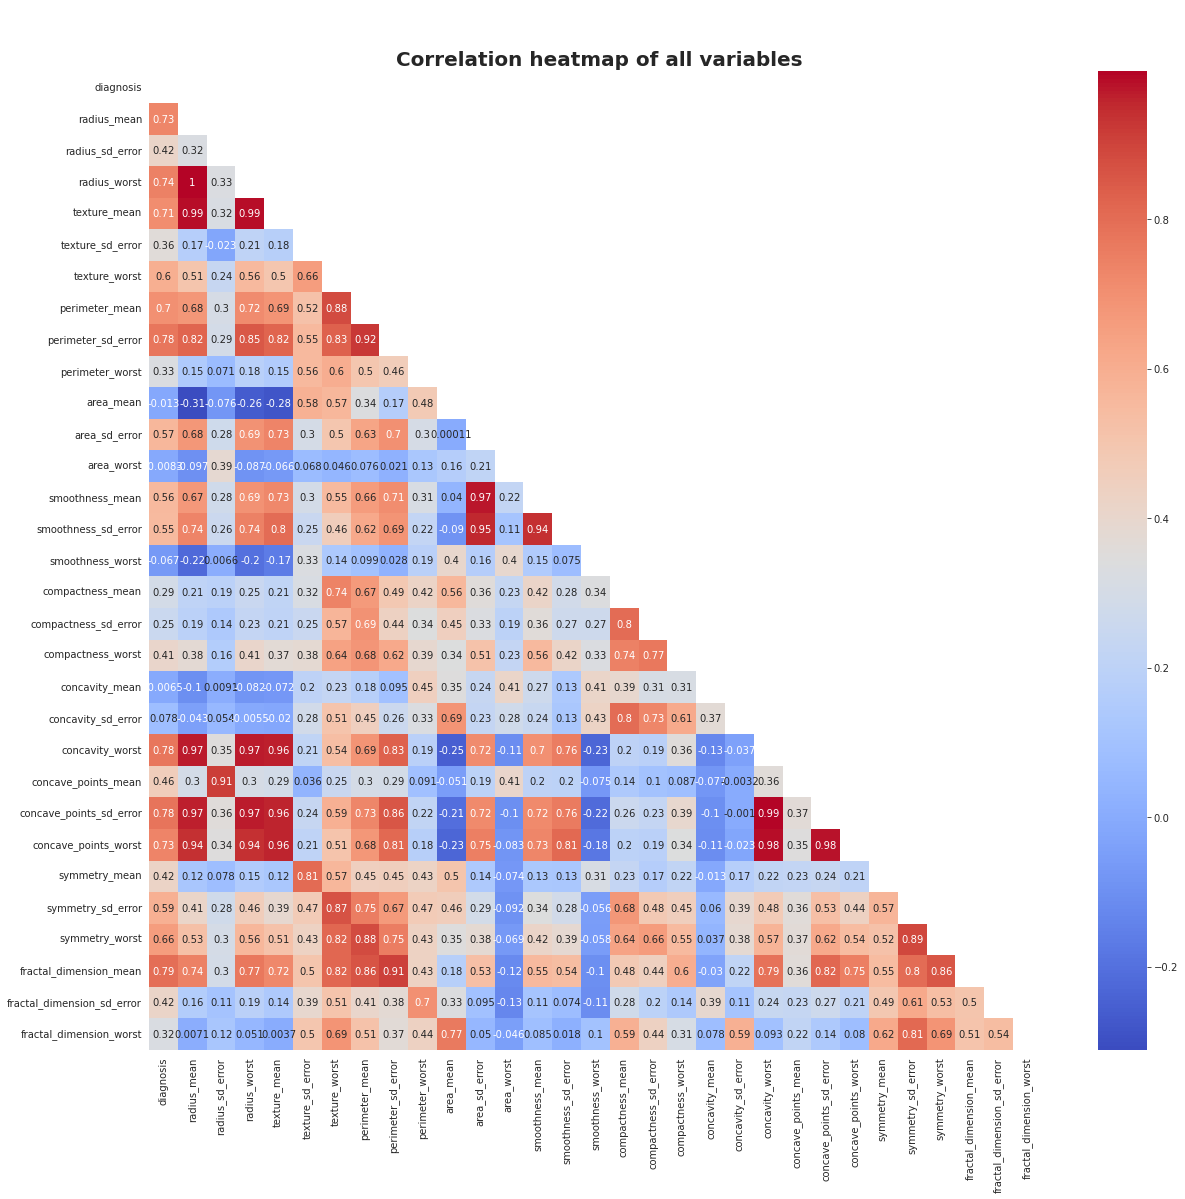

In [43]:
# correlation heat map
corr_matrix = data.corr()
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,18 ))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    ax = sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, cmap='coolwarm')
plt.title("\n\n Correlation heatmap of all variables", fontweight='bold', fontsize=20)
plt.show()

#### Too many correlation variables to visualize, so let us filter the ones that cross a certain threshold

In [44]:
threshold = 0.75
filter_ = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filter_].tolist()
threshold_corr_matrix = data[corr_features].corr()

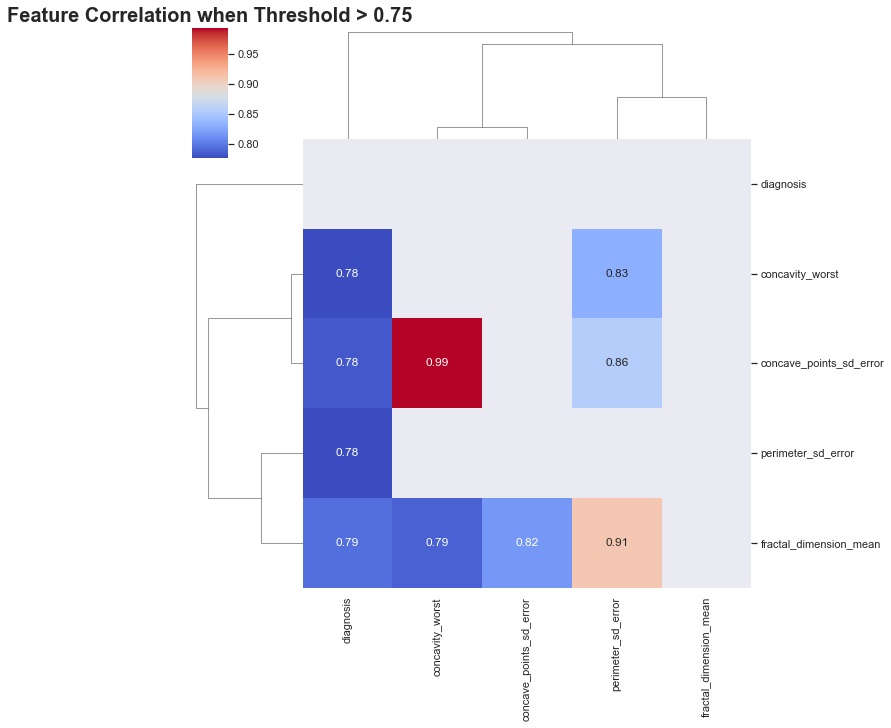

In [45]:
sns.set(rc={'figure.figsize':(5,8)})
mask = np.zeros_like(threshold_corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.clustermap(threshold_corr_matrix, mask=mask, annot = True, fmt = '.2f', cbar=True, cmap='coolwarm')
plt.title("Feature Correlation when Threshold > 0.75", fontweight='bold', fontsize=20, loc='center')
plt.show()

### 6.2 Using pair plots of highly correlated variables

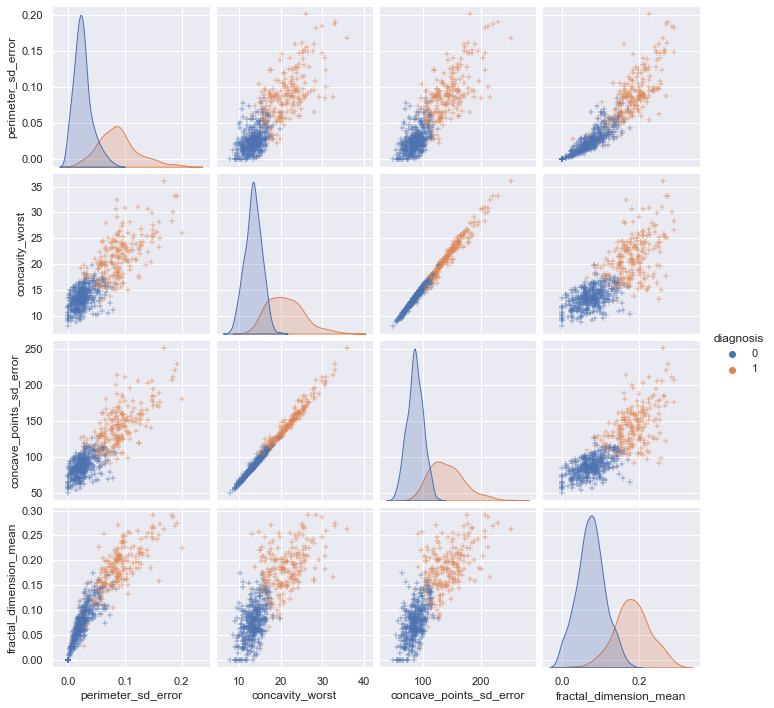

In [46]:
# Pair Plot
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+", hue = "diagnosis")
plt.show()

# Learning from the correlation map  and pair plots
- **Diagnosis variable has mediam-high correlation with fractal_dimension_mean, perimeter_sd_error, concave_points_ed_error, concavity_worst (above 0.75)**. These 4 variables appear to be the most important predictors of the type of tumor from exploratory analysis.
- Very High correlation exists between a few variables (above 0.9). One out of each highly correlated pair can be used for modeling 
- From the pair plots, it is evident that most pairs are linearly separable for Malignant and bening tumor

## Part 1-Section 5 : Predictive Modeling 

## 7. Modeling

### 7.1    Feature Engineering

#### 7.1.1 Remove one from each highly correlated (>0.9) dependant variables pairs

In [47]:
threshold = 0.9
df_corr = corr_matrix.abs()

In [48]:
df_corr.shape

(31, 31)

In [49]:
columns = np.full((df_corr.shape[0],), True, dtype=bool)

for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False

selected_columns = data.columns[columns]

In [50]:
list(selected_columns)

['diagnosis',
 'radius_mean',
 'radius_sd_error',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [51]:
data = data[selected_columns]

#### 7.1.2 Split features and target variables

In [52]:
y = data['diagnosis']
X = data.drop(['diagnosis'], axis=1)

#### 7.1.3 Split into train and validation set (70:30)

In [53]:
random_seed = 1
(X_train, X_valid, y_train, y_valid) = train_test_split(X, y, test_size=0.3, random_state=random_seed)

#### 7.1.3 Scale the features

In [54]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

### 7.2 Machine learning modeling

#### 7.2.1 Logistic Regression (Regression based model)

#### - Advantages:
1. Logistic regression is easier to implement, interpret, and very efficient to train.
2. It makes no assumptions about distributions of classes in feature space. Since we have a slightly imbalanced dataset, this advantage can be very useful
3. It not only provides a measure of how appropriate a predictor(coefficient size)is, but also its direction of association (positive or negative). This advantage can be used to determine the most important features in out feature list.
4. It performs well when the dataset is linearly separable. From the pair plot visualizations, we can conclude that the output classes are linearly separable hence Logistics Regression can be a good choice
5. Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets. One may consider Regularization (L1 and L2) techniques to avoid over-fittingin these scenarios, which we will use.

#### - Disadvantages:
1. If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting. Not in our case, so we can go ahead and use it.
2. It constructs linear boundaries. Therefore, for non-linear separable data it would not be a good choice.
3. The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.
4. Logistic Regression requires average or no multicollinearity between independent variables. Therefore it is important to remove the inter-correlated dependant variables.
5. It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.
6. In Linear Regression independent and dependent variables are related linearly. But Logistic Regression needs that independent variables are linearly related to the log odds (log(p/(1-p)).


#### - Mechanism to control overfitting:
1. Use k-fold Cross Validation 
2. Use L1 (Lasso) regularization which combats overfitting by shrinking the parameters towards 0. This makes some features obsolete.
3. Use balanced class weight, which combats overfitting if there is class imbalance

- **Train using Cross Validation and Grid Search to find the best model parameters**

In [55]:
lr = LogisticRegression()

# defining parameter range

param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[200,300,400,500],
    'class_weight': ['balanced'],
    'penalty': ['l1'],
}
grid = GridSearchCV(lr, param_grid, cv=10, scoring='f1',
                    verbose=1,return_train_score=True)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

# getting the results
best_params = grid_search.best_params_
best_f1score = grid_search.best_score_
print(f"Best params = {best_params}\n"+
      f"Best f1 score = {best_f1score}")

# final model
lr_best = grid_search.best_estimator_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best params = {'class_weight': 'balanced', 'max_iter': 400, 'penalty': 'l1', 'solver': 'saga'}
Best f1 score = 0.9628960235064241


#### 7.2.3 Light GBM (Tree-based model)

#### - Advantages + comparison with Logistic Regression:
1. It is an ensemble model and it can fix the errors generated by predecessor trees. This ensures a continuous feedback loop, which is not the case for Logistic Regression.
2. As an ensemble model, boosting comes with an easy-to-read and interpret algorithm, making its prediction interpretations easy to handle.
3. No data pre-processing required - often works great with categorical and numerical values as is. In contrast, Logistic Regression requires feature scaling.
4. Although there are no missing values in our dataset, it can handle missing data, therefore imputation is not required. In contrast, Logistic Regression cannot handle missing data.

#### - Disadvantages + comparison with Logistic Regression:
1. Compared to Logistic Regression, it is sensitive to outliers because of boosting - since every classifier is obliged to fix the errors in the predecessors.
2. LightGBM is a Gradient Boosting Model whoch will continue improving to minimize all errors. This can overemphasize outliers and cause overfitting.
3. It is computationally expensive compared to Logistic Regression - often require many trees (>1000) which can be time and memory exhaustive.
4. There are many hyperparameters that can be set, and this model is more flexible than Logistic Regression. The high flexibility results in many parameters that influence heavily the behavior of the approach (number of iterations, tree depth, regularization parameters, etc.). This requires a large grid search during tuning.


#### - Mechanism to control overfitting:
1. Use k-fold Cross Validation 
2. Use L1 (Lasso) regularization which combats overfitting by shrinking the parameters towards 0. This makes some features obsolete.
3. Use balanced class weight, which combats overfitting if there is class imbalance
4. Control the max depth of the trees. Depth of the trees is a major reason for overfitting in tree-based models
5. Use different learning rates

- **Train using Cross Validation and Grid Search to find the best model parameters**

In [56]:
lightgbm=LGBMClassifier()

# defining parameter range
param_grid = {'max_depth': np.arange(2,10,2),
             'learning_rate': [0.0001,0.001,0.01,0.1,1],
             'n_estimators': np.arange(200,1000,200)}

grid = GridSearchCV(lightgbm, param_grid, cv=10, scoring='f1',
                    verbose=1, return_train_score=True, n_jobs=-1)

# fitting the model for grid search
grid_search = grid.fit(X_train,y_train)

# getting the results
best_params = grid_search.best_params_
best_f1score = grid_search.best_score_
print(f"Best params = {best_params}\n"+
      f"Best f1 score = {best_f1score}")

# final model
lightgbm_best = grid_search.best_estimator_

Fitting 10 folds for each of 80 candidates, totalling 800 fits
Best params = {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 800}
Best f1 score = 0.955572660098522


#### 7.2.3 Choose the best param set for lr and lightgbm, and fit on the train set

In [57]:
lr_best.fit(X_train, y_train)
lightgbm_best.fit(X_train, y_train)

LGBMClassifier(max_depth=4, n_estimators=800)

### 7.3 Evaluate on validation set

In [58]:
classifiers = [lr_best, lightgbm_best]
predictions = {}
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    predictions[type(classifier).__name__] = classifier.predict(X_valid)

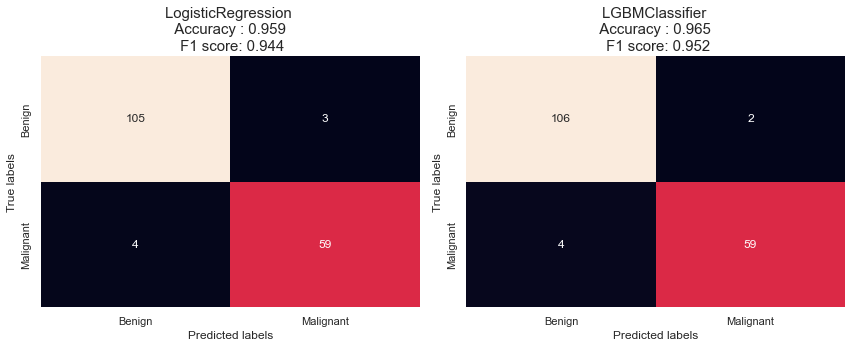

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

for classifier, ax in zip(classifiers, axes.flatten()):
    cls_predictions = predictions[type(classifier).__name__]
    cm = confusion_matrix(y_valid, cls_predictions)
    sns.heatmap(cm, ax=ax, cbar=i==4, annot=True, xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'], fmt = 'd')
    ax.set_title("{} \n Accuracy : {:.3f} \n F1 score: {:.3f}".format(type(classifier).__name__, 
                                                              accuracy_score(y_valid, cls_predictions), 
                                                              f1_score(y_valid, cls_predictions)
                                                             ) 
                 ,fontsize=15)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

plt.tight_layout()  
plt.show()

## Learnings from model evaluation:
- Light GBM classifer has a better accuracy and smaller misclassification rate on the validation dataset, hence it is the better model
- Validation F1 score for Light GBM model is more closer to th Train F1 score as compared to Logistic Regression, hinting that Light GBM has generalized much better compared to LR

## Part 1-Section 6: Feature Importance

### 7.4 Identify most important predictive variables

After train_test_split, the feature names are lost. So we have to bind them back together


In [60]:
feature_names = list(X.columns)

#### 7.4.1 Logistic Regression feature importance

In [61]:
feature_importances = list(lr_best.coef_[0])

In [62]:
# summarize feature importance
for name, importance in zip(feature_names,feature_importances):
    print("Feature {} : \t Coefficient: {:.5f}".format(name, importance))

Feature radius_mean : 	 Coefficient: 3.23661
Feature radius_sd_error : 	 Coefficient: 1.09087
Feature texture_sd_error : 	 Coefficient: 0.00000
Feature texture_worst : 	 Coefficient: 0.00000
Feature perimeter_mean : 	 Coefficient: 1.14755
Feature perimeter_worst : 	 Coefficient: 0.00000
Feature area_mean : 	 Coefficient: -0.43352
Feature area_sd_error : 	 Coefficient: 2.88707
Feature area_worst : 	 Coefficient: 0.00000
Feature smoothness_worst : 	 Coefficient: 0.00000
Feature compactness_mean : 	 Coefficient: -0.45712
Feature compactness_sd_error : 	 Coefficient: -0.00659
Feature compactness_worst : 	 Coefficient: 0.49617
Feature concavity_mean : 	 Coefficient: -0.75995
Feature concavity_sd_error : 	 Coefficient: -0.94993
Feature symmetry_mean : 	 Coefficient: 0.77376
Feature symmetry_sd_error : 	 Coefficient: 0.00000
Feature symmetry_worst : 	 Coefficient: 1.01092
Feature fractal_dimension_sd_error : 	 Coefficient: 0.89281
Feature fractal_dimension_worst : 	 Coefficient: 0.53539


In [63]:
lr_feature_imp_df = pd.DataFrame(list(zip(feature_names, feature_importances, [abs(x) for x in feature_importances])), columns=['feature','coefficient','coefficient_abs'])
lr_feature_imp_df.sort_values(by=['coefficient_abs'], ascending=False, inplace=True)
lr_feature_imp_df['coefficient'] = lr_feature_imp_df['coefficient'].apply(lambda x:round(x,3))

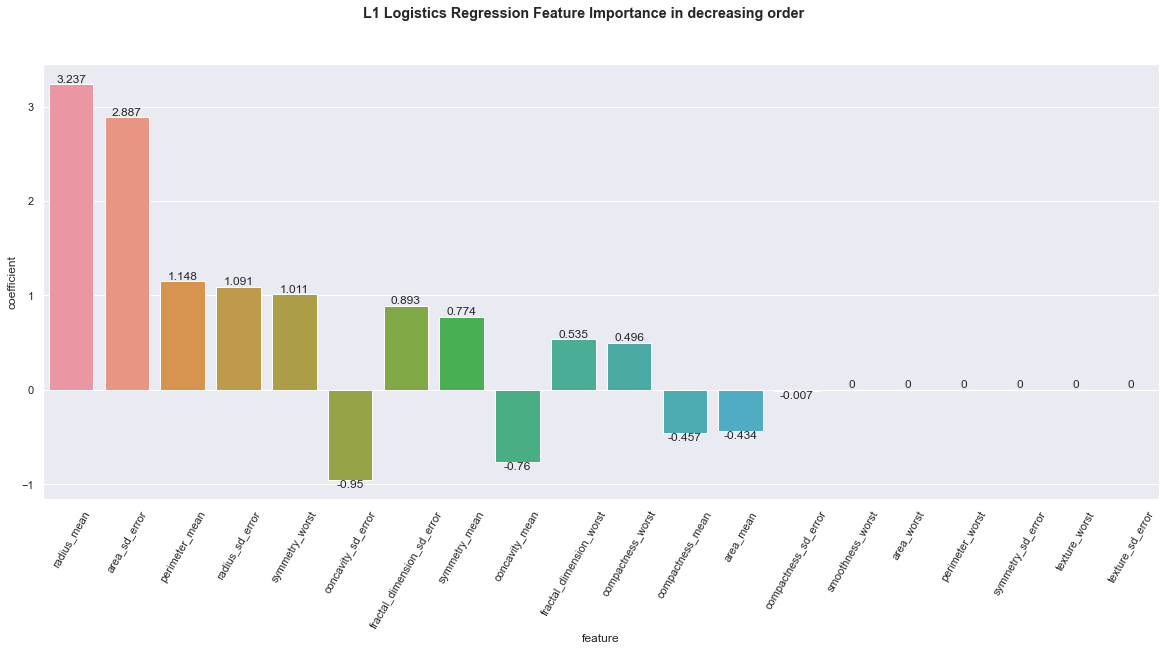

In [64]:
plt.figure(figsize = (20,8))
plt.xticks(rotation=60)
plt.suptitle('L1 Logistics Regression Feature Importance in decreasing order', fontweight='bold')
plot = sns.barplot(x = "feature", y = "coefficient", data = lr_feature_imp_df)
plot.bar_label(plot.containers[0])
# plt.tight_layout()
plt.show()

## Learnings from plot the feature importance from Logistic Regression model
- 4 out of top 5 important variable - radius_mean, area_sd_error, perimeter_mean, radius_sd_error have a positive coefficient. It means that if the value of these features increase, the likelihood of the tumor being Malign **increases**
- Concavity_sd_error has negative coefficient. It means that if the standard error of concavity is higher, the likelihood of the tumore being Maling **decreases**

#### 7.4.2 LightGBM feature importance

In [65]:
feature_importances = list(lightgbm_best.feature_importances_)

In [66]:
# summarize feature importance
for name, importance in zip(feature_names,feature_importances):
    print("Feature {} : \t Coefficient: {:.5f}".format(name, importance))

Feature radius_mean : 	 Coefficient: 364.00000
Feature radius_sd_error : 	 Coefficient: 226.00000
Feature texture_sd_error : 	 Coefficient: 85.00000
Feature texture_worst : 	 Coefficient: 50.00000
Feature perimeter_mean : 	 Coefficient: 139.00000
Feature perimeter_worst : 	 Coefficient: 49.00000
Feature area_mean : 	 Coefficient: 48.00000
Feature area_sd_error : 	 Coefficient: 212.00000
Feature area_worst : 	 Coefficient: 32.00000
Feature smoothness_worst : 	 Coefficient: 31.00000
Feature compactness_mean : 	 Coefficient: 57.00000
Feature compactness_sd_error : 	 Coefficient: 68.00000
Feature compactness_worst : 	 Coefficient: 101.00000
Feature concavity_mean : 	 Coefficient: 109.00000
Feature concavity_sd_error : 	 Coefficient: 89.00000
Feature symmetry_mean : 	 Coefficient: 166.00000
Feature symmetry_sd_error : 	 Coefficient: 52.00000
Feature symmetry_worst : 	 Coefficient: 167.00000
Feature fractal_dimension_sd_error : 	 Coefficient: 114.00000
Feature fractal_dimension_worst : 	 Coe

In [67]:
lightgbm_feature_imp_df = pd.DataFrame(list(zip(feature_names, feature_importances, [abs(x) for x in feature_importances])), columns=['feature','importance','importance_abs'])
lightgbm_feature_imp_df.sort_values(by=['importance_abs'], ascending=False, inplace=True)
lightgbm_feature_imp_df['importance'] = lightgbm_feature_imp_df['importance'].apply(lambda x:round(x,3))

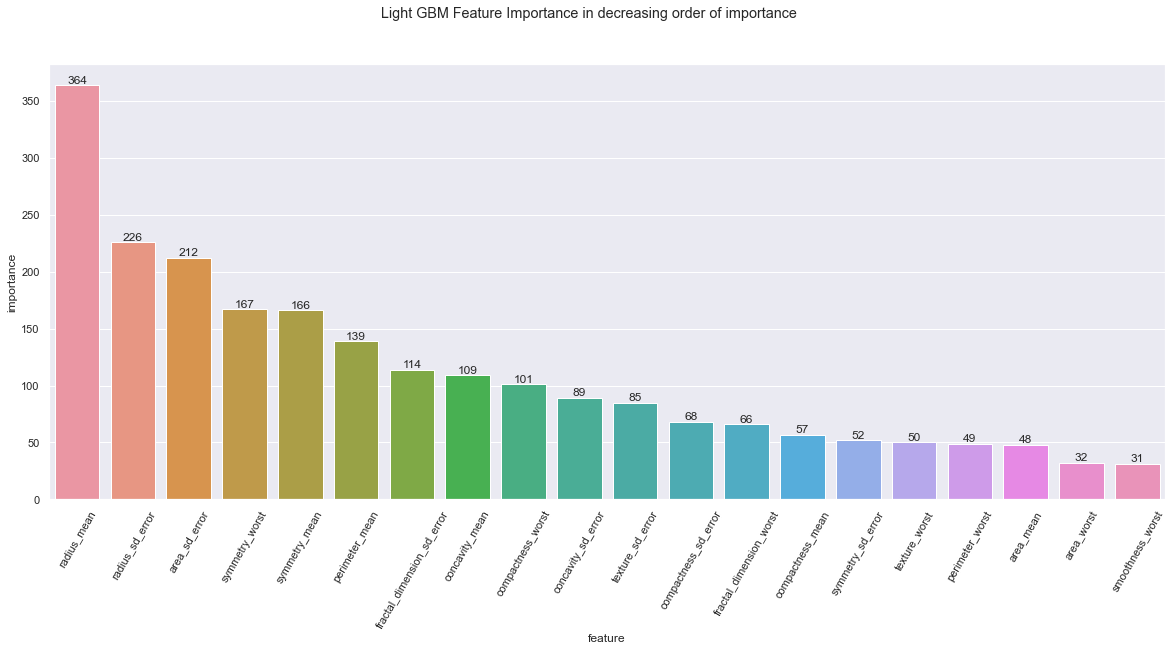

In [68]:
plt.figure(figsize = (20,8))
plt.xticks(rotation=60)
plt.suptitle('Light GBM Feature Importance in decreasing order of importance')
plot = sns.barplot(x = "feature", y = "importance", data = lightgbm_feature_imp_df)
plot.bar_label(plot.containers[0])
# plt.tight_layout()
plt.show()

## Learnings from plot the feature importance from Light GBM model
- Size of the tumor's radius, standard error of the radius, standard error of the area, worst value of symmetry and mean value of symmetry of the tumor are the top 5 important variables in predicting the tumor. 

## <font color='green'>FINAL MODEL : LightGBM </font>

## Part 1-Section 7 : Final Note

# <font color='blue'>To Technical audiences:</font>

### Limitations:
- A major limitation is that the actual samples of data are not provided. The model explainability could have been much better if the actual data samples were provided. It would have eliminated the need for all feature_worst variables.
- Due to absense of subject matter expertise, feature engineering was not as rich as it shoukd have been. For example, there could be a lot of composite variables and Endogeneity bias in the model, but unless we have the co-founding variables it is hard to eliminate this bias.
- The total data size is just 569 records, which is a small. More data would help build a more robust model that can generalize better

### Future steps:
- Feature scaling for Logistic Regression was necessary, but it is not necessary for LightGBM. Same scaled data was used **intentionally** to train both models to do a 1:1 comparison of the 2 models used. For the next step, LightGBM model can be trained on non-scaled features
- Use real world data samples instead of aggregated values (mean, sd_error and worst) to refine the model further
- Feature selection methods were not used in this process. We can use Forward and Backward Stepwise variable selection and evaluate the p-values and increase in R squared value to select the most significant features for Regression
- AUC-ROC was not used in the classification process, and it was **deliberately** left out since the data size is small and the F1 score was already good for the two models that we used. AUC-ROC can be used for more advanced insights
- **MOST IMPORTANT** The models were trained to achieve better F1 score or reduce the misclassificaion rate. In medical applications of predictive analytics, the False Negative rate is generally the most important classification metric. In our case, we should aim to minimize the cases where a Malignant tumor was predicted as Bening tumor (False Negative) because a malignant tumor has irregular borders and grows faster than a benign tumor. A malignant tumor can also spread to other parts of your body. A benign tumor can become quite large, but it will not invade nearby tissue or spread to other parts of your body. The correction can be made in the next iteration of modeling.

______________________________________________________________________________________________________________________________

# <font color='blue'>To Non-Technical Audiences (Also Recommended for Tecnical audience):</font>

## Exploratory Data Analysis (EDA)
- Using Exploratory Data Analysis, we tried to replicate the behaviour of a doctor by trying to conclude the type of tumor by looking at the properties of the two types of tumor.
- In exploratory data analysis, we analyzed the data to find correlations between the diagnosis and the respective values of the tumor's features. Fractal_dimension_mean, perimeter_sd_error, concave_points_sd_error and concavity_worst had the highest correlation with the type of tumor. It means that these 4 variables are important in predicting the type of tumor.
- Also evident from the box plot - the median of Malignant and Bening tumor for fractal_dimension_mean are the furthest apart; which is also true for the remaining highly correlated variables. These 4 appear to be the most important predictors from the exploratory analysis.  
- It was found that the features are very differnt for Malignant tumor as compared to Bening tumor, details of which can be found in the learning from box plots. Therefore, a correct diagnosis of the type of tumor based on the values of the tumor's features is very likely possible. The outliers from the box plots are the most concerning situations, due to which the diagnosis can go wrong. 

## Predictive Modeling
- We used Predictive classification to identify the type of tumor from the given values of the tumor's features. 
- A machine learning classification model looks at the associations and differences in the data and tries to predict the outcome. Explanation of how the two models used work:


### Brief overview of the differnt models

- Linear **Regression** tries to estimate a mathematical formula function in the form *Outcome = Coef1 * input_variable_1 + Coef2 * input_variable_2 + ..... + base*. Logistic regression is a modified version of linear regression and tries to estimates the probability of the class (malignant or bening) instead of the numeric *Outcome* 
- **Tree** based models build a mathematical representation of a hierarchy of rules to identify the output class (malignant or bening). The model starts building a tree from the root, and splits the data further based on entropy and information gain to decide the best split criteria. It splits until a convergence point is reached or we set a stopping criteria. Convergence point means that there is not more advantage of splitting the tree further, and stopping criteria means that we have applied restrictions and threshold to prevent further split into sub-trees. The majority class in the leaf node, or the nodes that do not have any more children is the output prediction class.

### Process and evaluation

- We split the dataset into training and validation/holdout set. A ratio is pre-decided and it is important to maintain the balance of classes in each set.
- We have used cross validation method to reduce overfitting. Overfitting means that the model was extremely fine-tuned on the training set and would not give a good performance on unknown data. 
- Since we know the actual tumor type for the 2 subsets, the model is first trained using one portion of the Training set and minimizes the error by comparing the predicted vs actual tumor type from the remining portion of the training set. This process is repeated by jumbling the portions used for training and testing within the train cycle. The *k* in k-fold cross-validation decides the portion allocation to train and test from the training set. The best parameters are noted for each model.
- After achieving the goal in training, we use the best paramers to train the model on the entire training set and test the evaluation metriv on the validation set. This part is important as it would help identify how well the model is able to generalize. 
- The F1 score was used as the evaluation metric. It is a weighted measure of the misclassification rate, which weighs in the precision and recall of the model. Precision is the ratio between the True Positives (Actual and Predicted are Malign tumor) and all the Positives (All actual Malign tumor). The recall is the measure of our model correctly identifying True Positives (Actual and Predicted are Malign tumor). The goal of the modeling process was to achieve the best F1 score. 
- The final model was chosen on the basis of the highest F1 score, in our case the Light GBM model. The F1 score of Light GBM 0.945, with 4 instances predicted as Benign but were Malignant and 2 instances predicted as Malignant but were Benigh

### Identifying the most important features

- Fore Logistic Regression model, the coefficients of the input variables tell us how important the variable is in predicting the outcome. Please note that the coefficients can be positive or negative. 
- 4 out of top 5 important variable - radius_mean, area_sd_error, perimeter_mean, radius_sd_error have a positive coefficient. It means that if the value of these features increase, the likelihood of the tumor being Malign **increases**
- Concavity_sd_error has negative coefficient. It means that if the standard error of concavity is higher, the likelihood of the tumore being Maling **decreases**
- The other model (lightgbm) does not report the coefficient but gives us the importance of the input variable in predicting the outcome. Size of the tumor's radius, standard error of the tumor radius, standard error of the tumor area, worst value of tumor symmetry and mean value of tumor symmetry are the top 5 important variables in predicting the tumor. 


_______________________________________________________________________________________________________________________________

<br />

# Part 2 : Feedback and Code Review

## Sample 1

### Original code

```python
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')

# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)


# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())
```
______________________________________________________________________________________________________________________________


### Review

### 1.
```python
import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score
```
### <font color='red'>Instuctor comments</font>
#### Code errors:
- `from sklearn import LinearRegression` will throw an error. Instead, use `from sklearn.linear_model import LinearRegression`
- `from sklearn.cross_validation import cross_val_score` will throw an error as it is deprecated and no longer supported. Instead, use `from sklearn.model_selection import cross_val_score`

______________________________________________________________________________________________________________________________

### 2.
```python
# Load data
d = pd.read_csv('../data/train.csv')
```
### <font color='red'>Instuctor comments</font>
#### Code sanity:
Use more readable dataframe name instead of *d*. Variable names have to be self explanatory and should not be single character
You can use something like *data* or  *train_data*

______________________________________________________________________________________________________________________________



### 3.

```python
# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)
```

### <font color='red'> Instuctor comments </font>
#### Code errors:

- The dataframe imported from csv was named **d** but it is referenced as **data** later on. This will throw an error as **data** df does not exist


#### Code sanity:
- Use more readable variable names. *x1* in your case represents the output variable and *x2* represents the input feature. You could use <b>*X*</b> (in capital) to represent the input feature or set of input features and <b>*y*</b> to represent the output variable. Supervised ML Modeling is about function estimation given input variables and output variable. To understand using analogy, recall the **straight line equation**, which is . </br></br>
 <b>*y* = $\alpha $<sub>1</sub> * X + m </b> </br></br>
Using supervised ML, you are trying to estimate the **function**, similar to the straight line function above

#### Conceptual understanding:
- Split the data into train_set and holdout_set using `train_test_split`. Train using train_set and test the accuracy using holdout_set
- ContractType has a lot of missing values: 6,444 out of 10,000 records. Since you are using this as the only input feature, eliminate all the records with missing ContractType. Please note that on doing this, the resulting dataset will be small and the model will not be accurate.
- Use more input features from the dataset. Using just the *ContractType* to predict the Salary is not viable by business logic. You can also prove it using statistics like mean and median. You can also visualize using a scatter plot or box plots. Upon plotting, the salaries of each contract type have to be different and linearly separable to get accurate predictions. 
- If you choose more input features for the model, check for the variable types. If they are numeric, then they can be used as-is. If not, then one-hot-encoding (OHE) is necessary as you did for *ContractType*. Please note that the number of unique values in a column after OHE should be limited and less than the number of total input rows. If there are too many unique values in the input column, for example *Title* or *FullDescription*, try to use text tokenization and other NLP techniques if you are familiar with them. Else, no need to use these 2 variables for input.

______________________________________________________________________________________________________________________________


### 4.
```python
# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())
```

### <font color='red'> Instuctor comments </font>
#### Code errors:

- `from sklearn.cross_validation import train_test_split` is duplicated and incorrect.
- `from sklearn.model_selection import train_test_split` will throw an error as it is deprecated and no longer supported in python. Instead, use `from sklearn.model_selection import train_test_split` and move it to the top where import statements are declared
- `'mean_absolute_error'` is not a valid metric supported in sklearn, instead use `'neg_mean_absolute_error'` as the scoring metric
- `cv=1` will throw an error as there needs to be more than one cross-validation set. Use the correct 'train_set' after 'train_test_split' Set `cv` to at least 4 *(k-fold, where k=4)*, which will ensure that 75% of the `train_set` is used for training and 25% is used for testing/evaluation

#### Conceptual understanding:
- Instead of just checking the `scores.mean()`, check the indidual fold's MAE from each k-fold and verify if it is consistent for all *k* folds. If consistent, then you know that the model has not overfit. 
- Once satisfied with the MAE, `model` needs to be fitted to the train_set and evaluated on the holdout_set for evaluation.

______________________________________________________________________________________________________________________________


</br>

## Sample 2
### Original code
```python
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())
```
_______________________________________________________________________________________________________________________________

### Review

### 1.
```python
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
```
### <font color='red'>Instuctor comments</font>
#### Code errors:
- `from sklearn.cross_validation import cross_val_score` will throw an error as it is deprecated and no longer supported. Instead, use `from sklearn.model_selection import cross_val_score`

______________________________________________________________________________________________________________________________

### 2.

```python
# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)
```

### <font color='red'> Instuctor comments </font>

#### Conceptual understanding:
- Split the data into train_set and holdout_set using `train_test_split`. Train using train_set and test the accuracy using holdout_set
- ContractType has a lot of missing values: 6,444 out of 10,000 records. Since you are using this as the only input feature, eliminate all the records with missing ContractType. Please note that on doing this, the resulting dataset will be small and the model will not be accurate.

- Use more input features from the dataset. Using just the *ContractType* to predict the Salary is not viable by business logic. You can also prove it using statistics like mean and median. You can also visualize using a scatter plot or box plots. Upon plotting, the salaries of each contract type have to be different and linearly separable to get accurate predictions. 

- If you choose more input features for the model, check for the variable types. If they are numeric, then they can be used as-is. If not, then one-hot-encoding (OHE) is necessary as you did for *ContractType*. Please note that the number of unique values in a column after OHE should be limited and less than the number of total input rows. If there are too many unique values in the input column, for example *Title* or *FullDescription*, try to use text tokenization and other NLP techniques if you are familiar with them. Else, no need to use these 2 variables for input.

______________________________________________________________________________________________________________________________


### 3.
```python
# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())
```

### <font color='red'> Instuctor comments </font>
#### Code errors:

- `'mean_absolute_error'` is not a valid metric supported in sklearn, instead use `'neg_mean_absolute_error'` as the scoring metric

#### Conceptual understanding:
- Instead of just checking the `scores.mean()`, check the indidual fold's MAE from each k-fold and verify if it is consistent for all *k* folds. If consistent, then you know that the model has not overfit. 
- Once satisfied with the MAE, `model` needs to be fitted to the train_set and evaluated on the holdout_set.

______________________________________________________________________________________________________________________________
